In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymysql.cursors

In [9]:
results = []
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='',
                             db='fitosanitarios',
                             charset='utf8')

try:
    sql = \
        """
        SELECT COUNT(*) num_productos -- , C.CultivosEnFitosanitarios, EfectosEnPlagas,
        FROM usoautorizado U
        LEFT JOIN cultivosenfitosanitarios C ON (U.CultivosEnFitosanitariosId = C.CultivosEnFitosanitariosId)
        LEFT JOIN efectosenplagas E ON (U.EfectosEnPlagasId = E.EfectosEnPlagasId)
        GROUP BY C.CultivosEnFitosanitariosId, E.EfectosEnPlagasId
        ORDER BY num_productos DESC;	
        """
    results = pd.read_sql(sql, connection)

except Exception as e:
    print(e)
finally:
    connection.close()

In [12]:
results.head()

,num_productos
0,356
1,331
2,271
3,270
4,255


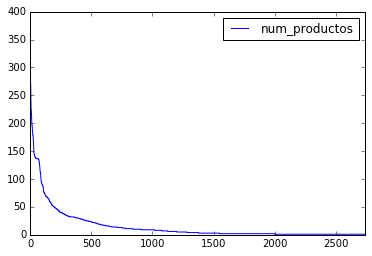

In [15]:
plt.figure(figsize=(12,10))
results.plot()